In [1]:
# 드라이브에 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/project

/content/drive/MyDrive/project


In [4]:
ls

 １０／２０　작업물.ipynb              regime_4_ACC.csv
 10.23작업물-1.ipynb                   regime_4.csv
'2023-10-13 작업물.ipynb'              regime_4_nb.csv
 catboost_info/                        regime_ACC.zip
'Copper Futures Historical Data.csv'   regime.zip
 Data_KRX_Sector_Indices.csv           scaled_df1.csv
 df_concat.csv                         scaled_df2.csv
 df_daily_fillna                       scaled-df3.csv
 df_daily_fillna.csv                  'South Korea 10-Year Bond Yield Historical Data.csv'
 df_daily_fillna_nb.csv               'South Korea 2-Year Bond Yield Historical Data.csv'
 df_hangul.csv                         sp500_index.csv
 df_melted.csv                         table_plotly.png
 df_monthly_return                     Ticker_master.xlsx
 df_monthly_return.csv                 Untitled
 df_monthly_return_nb.csv              Untitled0.ipynb
'df_monthly_return(regime).csv'        Untitled.ipynb
 df_monthly_return_regime.csv          결측치.ipynb
 df_ris

In [5]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.pylab import rcParams
import warnings
import statsmodels.api as sm
warnings.filterwarnings(action='ignore')

# font_path = 'drive/MyDrive/project/Fonts/malgun.ttf' # plot 차트 그릴 때 한글 폰트 깨짐현상 방지용
# plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()
plt.rcParams['axes.unicode_minus'] = False


rcParams['figure.figsize'] = 16,6

In [6]:
monthly_return_regime = pd.read_csv('df_monthly_return(regime).csv', index_col='date', parse_dates=True)
monthly_return_regime

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_HG1 Comdty,TK_KOCPI Index,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SKLILI Index,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index,국면,TK_LT12TRUU Index,TK_LUTLTRUU Index
date,,,,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0.052259,-0.156098,NaN,0.287610,0.079673,0.014412,-0.107626,0.125000,-0.049802,0.017725,NaN,NaN,1,NaN,-0.039098
1981-02-28,NaN,0.004031,0.023624,0.009336,NaN,0.244047,-0.014205,-0.023973,0.004772,0.123894,0.034355,0.032242,NaN,NaN,1,NaN,0.030845
1981-03-31,NaN,0.021322,-0.012149,0.104946,NaN,0.222593,0.030710,0.024978,0.108204,0.121739,0.030225,0.000711,NaN,NaN,1,NaN,-0.052921
1981-04-30,NaN,0.038031,0.043311,-0.053426,NaN,0.224144,0.137546,0.038457,0.005165,0.120690,-0.027532,0.015913,0.005182,NaN,1,NaN,0.064448
1981-05-31,NaN,-0.013278,0.046570,-0.033468,NaN,0.213219,0.021845,-0.004742,-0.016082,0.119658,-0.000980,0.037775,0.007063,NaN,1,NaN,-0.021314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.091137,0.021931,-0.014991,0.041578,0.062488,0.007379,0.050552,0.005403,0.083285,0.043172,0.037545,-0.003395,-0.023082,0.113402,4,0.001530,-0.006722
2020-01-31,-0.157241,-0.030178,0.009798,0.035862,-0.109027,0.014870,-0.025819,0.000014,-0.075986,0.045775,-0.009924,-0.003770,0.032033,-0.024129,4,0.001528,0.064396
2020-02-29,-0.106765,-0.088526,0.003395,-0.006657,0.015556,0.010603,-0.062236,-0.079618,0.007412,0.045694,-0.090707,-0.007360,0.016587,-0.085567,4,0.002724,0.068340


In [7]:
# 구간별 데이터 프레임 뽑기
구간1 = monthly_return_regime.loc[:'1983-03-31']
구간2 = monthly_return_regime.loc['1983-04-30':'1987-09-30']
구간3 = monthly_return_regime.loc['1987-10-31':'1995-12-31']
구간4 = monthly_return_regime.loc['1996-01-31':'1998-11-30']
구간5 = monthly_return_regime.loc['1998-12-31':'2000-07-31']
구간6 = monthly_return_regime.loc['2000-08-31':'2001-11-30']
구간7 = monthly_return_regime.loc['2001-12-31':'2002-11-30']
구간8 = monthly_return_regime.loc['2002-12-31':'2008-03-31']
구간9 = monthly_return_regime.loc['2008-04-30':'2008-11-30']
구간10 = monthly_return_regime.loc['2008-12-31':'2009-08-31']
구간11 = monthly_return_regime.loc['2009-09-30':'2010-05-31']
구간12 = monthly_return_regime.loc['2010-06-30':'2020-04-30']

In [8]:
# 시간 때문에 그냥 노가다 하기로 함
# 누적 수익률 함수화
def f_return_acc(x):
  return (1+x).cumprod()-1

In [9]:

# 비교를 위해 전체 누적 수익률 데이터 뽑기
return_acc = (1+monthly_return_regime.drop(columns=['국면','TK_KOCPI Index','TK_SKLILI Index'])).cumprod()-1
return_acc

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_HG1 Comdty,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index,TK_LT12TRUU Index,TK_LUTLTRUU Index
date,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0.052259,-0.156098,NaN,0.079673,0.014412,-0.107626,-0.049802,0.017725,NaN,NaN,NaN,-0.039098
1981-02-28,NaN,-0.040229,0.077118,-0.148219,NaN,0.064336,-0.009906,-0.103368,-0.017158,0.050538,NaN,NaN,NaN,-0.009459
1981-03-31,NaN,-0.019764,0.064032,-0.058828,NaN,0.097022,0.014824,-0.006348,0.012548,0.051285,NaN,NaN,NaN,-0.061879
1981-04-30,NaN,0.017515,0.110116,-0.109111,NaN,0.247913,0.053851,-0.001216,-0.015329,0.068015,0.005182,NaN,NaN,-0.001419
1981-05-31,NaN,0.004004,0.161814,-0.138928,NaN,0.275174,0.048854,-0.017279,-0.016294,0.108359,0.012282,NaN,NaN,-0.022703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.930511,7.618876,-0.014416,2.416879,2.383446,5.094007,1.345521,-0.113318,9.989751,-0.515657,1.029597,-0.271319,1.730321,31.534416
2020-01-31,0.626956,7.358776,-0.004759,2.539415,2.014559,4.936665,1.345554,-0.180693,9.880688,-0.517483,1.094611,-0.288902,1.734493,33.629502
2020-02-29,0.453254,6.618807,-0.001380,2.515853,2.061454,4.567191,1.158806,-0.174620,8.893734,-0.521034,1.129354,-0.349748,1.741942,35.996082


In [10]:
x = ['국면', 'TK_SKLILI Index', 'TK_KOCPI Index']

구간1_누적 = 구간1.apply(f_return_acc,axis=0).drop(columns=x)
구간2_누적 = 구간2.apply(f_return_acc,axis=0).drop(columns=x)
구간3_누적 = 구간3.apply(f_return_acc,axis=0).drop(columns=x)
구간4_누적 = 구간4.apply(f_return_acc,axis=0).drop(columns=x)
구간5_누적 = 구간5.apply(f_return_acc,axis=0).drop(columns=x)
구간6_누적 = 구간6.apply(f_return_acc,axis=0).drop(columns=x)
구간7_누적 = 구간7.apply(f_return_acc,axis=0).drop(columns=x)
구간8_누적 = 구간8.apply(f_return_acc,axis=0).drop(columns=x)
구간9_누적 = 구간9.apply(f_return_acc,axis=0).drop(columns=x)
구간10_누적 = 구간10.apply(f_return_acc,axis=0).drop(columns=x)
구간11_누적 = 구간11.apply(f_return_acc,axis=0).drop(columns=x)
구간12_누적 = 구간12.apply(f_return_acc,axis=0).drop(columns=x)

In [11]:
portfolio1 = pd.DataFrame()
portfolio1['best1'] = 구간1['TK_LUTLTRUU Index']
portfolio1['best2'] = 구간1['TK_LT12TRUU Index']
portfolio1

,best1,best2
date,,
1981-01-31,-0.039098,NaN
1981-02-28,0.030845,NaN
1981-03-31,-0.052921,NaN
1981-04-30,0.064448,NaN
1981-05-31,-0.021314,NaN
1981-06-30,-0.031537,NaN
1981-07-31,-0.041393,NaN
1981-08-31,-0.017202,NaN
1981-09-30,0.076733,NaN


In [12]:
portfolio3 = pd.DataFrame()
portfolio3['best1'] = 구간3['TK_LUTLTRUU Index']
portfolio3['best2'] = 구간3['TK_LT12TRUU Index']
portfolio3

,best1,best2
date,,
1987-10-31,0.000271,NaN
1987-11-30,0.019996,NaN
1987-12-31,0.060639,NaN
1988-01-31,0.010812,NaN
1988-02-29,-0.030301,NaN
...,...,...
1995-08-31,0.032590,0.004545
1995-09-30,0.014927,0.004991
1995-10-31,0.031696,0.004833


In [13]:
# 국면 2
portfolio2 = pd.DataFrame()
portfolio5 = pd.DataFrame()
portfolio7 = pd.DataFrame()
portfolio11 = pd.DataFrame()
portfolio2['best1'] = 구간2['TK_KOSPI Index']
portfolio2['best2'] = 구간2['TK_NKY Index']
portfolio5['best1'] = 구간5['TK_KOSPI Index']
portfolio5['best2'] = 구간5['TK_NKY Index']
portfolio7['best1'] = 구간7['TK_KOSPI Index']
portfolio7['best2'] = 구간7['TK_NKY Index']
portfolio11['best1'] = 구간11['TK_KOSPI Index']
portfolio11['best2'] = 구간11['TK_NKY Index']

In [14]:
# 국면 3
portfolio4 = pd.DataFrame()
portfolio9 = pd.DataFrame()
portfolio4['best1'] = 구간4['TK_USDKRW BGN Curncy']
portfolio4['best2'] = 구간4['TK_DAX Index']
portfolio9['best1'] = 구간9['TK_USDKRW BGN Curncy']
portfolio9['best2'] = 구간9['TK_DAX Index']

In [15]:
# 국면 4
portfolio6 = pd.DataFrame()
portfolio8 = pd.DataFrame()
portfolio10 = pd.DataFrame()
portfolio12 = pd.DataFrame()
portfolio6['best1'] = 구간6['TK_HG1 Comdty']
portfolio6['best2'] = 구간6['TK_GC1 Comdty']
portfolio8['best1'] = 구간8['TK_HG1 Comdty']
portfolio8['best2'] = 구간8['TK_GC1 Comdty']
portfolio10['best1'] = 구간10['TK_HG1 Comdty']
portfolio10['best2'] = 구간10['TK_GC1 Comdty']
portfolio12['best1'] = 구간12['TK_HG1 Comdty']
portfolio12['best2'] = 구간12['TK_GC1 Comdty']

In [17]:
pt_a = pd.concat([portfolio1, portfolio2,portfolio3,portfolio4,portfolio5,portfolio6,portfolio7,portfolio8,portfolio9,portfolio10,portfolio11,portfolio12])
pt_a

,best1,best2
date,,
1981-01-31,-0.039098,NaN
1981-02-28,0.030845,NaN
1981-03-31,-0.052921,NaN
1981-04-30,0.064448,NaN
1981-05-31,-0.021314,NaN
...,...,...
2019-12-31,0.062488,0.041578
2020-01-31,-0.109027,0.035862
2020-02-29,0.015556,-0.006657


In [20]:
pt_acc = pt_a.apply(f_return_acc,axis=0)
pt_acc

,best1,best2
date,,
1981-01-31,-0.039098,NaN
1981-02-28,-0.009459,NaN
1981-03-31,-0.061879,NaN
1981-04-30,-0.001419,NaN
1981-05-31,-0.022703,NaN
...,...,...
2019-12-31,221.802947,14.966303
2020-01-31,197.511410,15.538887
2020-02-29,200.599454,15.428788


In [21]:
pt_acc['portfolio'] = (pt_acc['best1']*0.5) + (pt_acc['best2']*0.5)
pt_acc

,best1,best2,portfolio
date,,,
1981-01-31,-0.039098,NaN,NaN
1981-02-28,-0.009459,NaN,NaN
1981-03-31,-0.061879,NaN,NaN
1981-04-30,-0.001419,NaN,NaN
1981-05-31,-0.022703,NaN,NaN
...,...,...,...
2019-12-31,221.802947,14.966303,118.384625
2020-01-31,197.511410,15.538887,106.525149
2020-02-29,200.599454,15.428788,108.014121


In [22]:
pt_acc['benchmark'] = return_acc['TK_KOSPI Index']

In [23]:
pt_acc = pt_acc.reset_index()

In [26]:
pt_acc.columns

Index(['date', 'best1', 'best2', 'portfolio', 'benchmark'], dtype='object')

In [27]:
df_melted = pd.melt(pt_acc,
                    id_vars='date',
                    value_vars=['best1', 'best2', 'portfolio', 'benchmark'],
                    var_name='ticker',
                    value_name='price')

In [28]:
df_melted

,date,ticker,price
0,1981-01-31,best1,-0.039098
1,1981-02-28,best1,-0.009459
2,1981-03-31,best1,-0.061879
3,1981-04-30,best1,-0.001419
4,1981-05-31,best1,-0.022703
...,...,...,...
1883,2019-12-31,benchmark,5.094007
1884,2020-01-31,benchmark,4.936665
1885,2020-02-29,benchmark,4.567191
1886,2020-03-31,benchmark,3.878084


In [29]:
df_melted.to_csv(
    path_or_buf = '/content/drive/MyDrive/project/df_portfolio.csv',
    index = False,
    sep = ',',      # 구분기호 설정
    encoding = 'utf-8',
    float_format='%f',     # 숫자 자리수 모두 표시
)

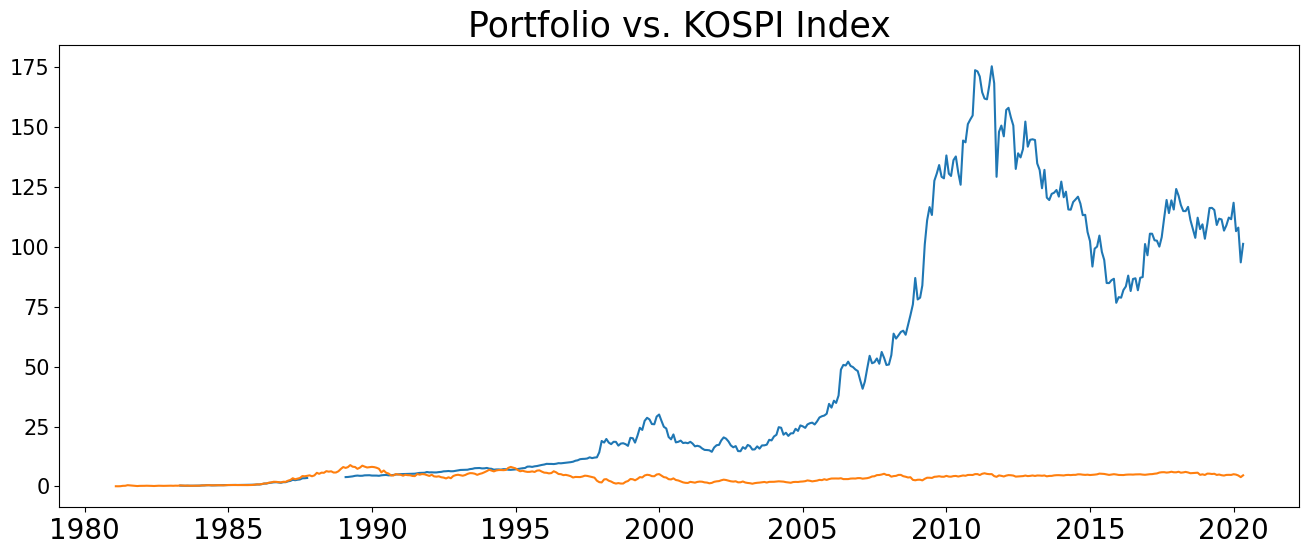

In [ ]:
plt.plot(pt_acc[['portfolio', 'benchmark']])
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=15)

plt.title("Portfolio vs. KOSPI Index", fontsize=25)
plt.show()

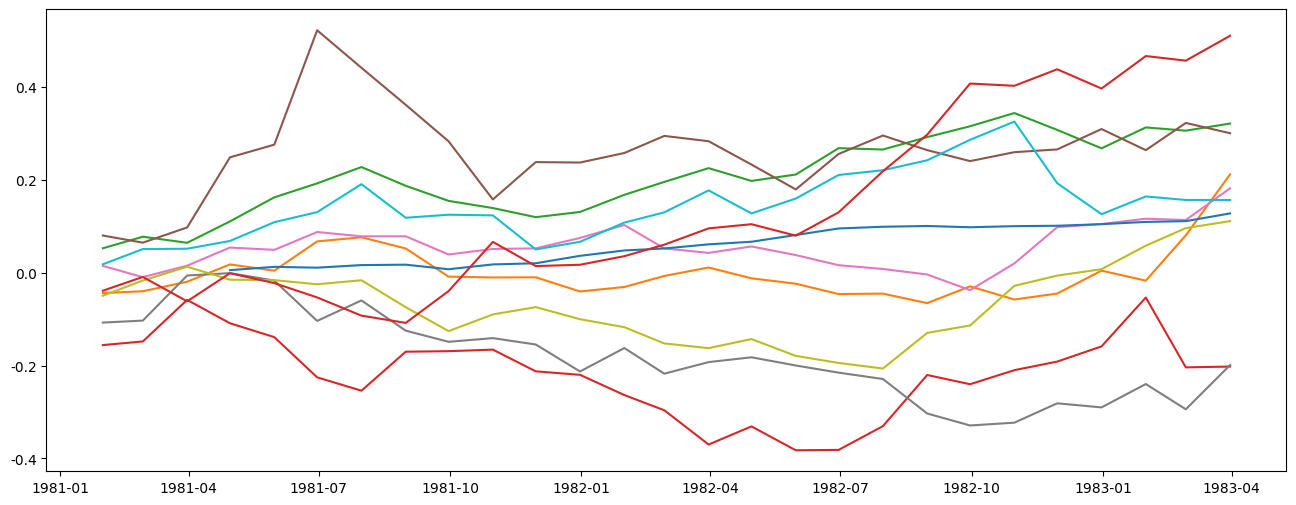

In [ ]:
plt.plot(구간1_누적)

In [ ]:
def MMD(row):
  if row >= 0:
    row = 0
    return row
  else:
    return row

In [ ]:
구간1_누적.columns

Index(['TK_CL1 Comdty', 'TK_DAX Index', 'TK_DXY Curncy', 'TK_GC1 Comdty',
       'TK_HG1 Comdty', 'TK_KOSPI Index', 'TK_NKY Index', 'TK_S 1 Comdty',
       'TK_SPX Index', 'TK_USDJPY BGN Curncy', 'TK_USDKRW BGN Curncy',
       'TK_XAU Index', 'TK_LT12TRUU Index', 'TK_LUTLTRUU Index'],
      dtype='object')

In [ ]:
x1 = pd.DataFrame()
x1['TK_CL1 Comdty'] = 구간1_누적['TK_CL1 Comdty'].apply(MMD)
x1['TK_DAX Index'] = 구간1_누적['TK_DAX Index'].apply(MMD)
x1['TK_DXY Curncy'] = 구간1_누적['TK_DXY Curncy'].apply(MMD)
x1['TK_GC1 Comdty'] = 구간1_누적['TK_GC1 Comdty'].apply(MMD)
x1['TK_HG1 Comdty'] = 구간1_누적['TK_HG1 Comdty'].apply(MMD)
x1['TK_KOSPI Index'] = 구간1_누적['TK_KOSPI Index'].apply(MMD)
x1['TK_NKY Index'] = 구간1_누적['TK_NKY Index'].apply(MMD)
x1['TK_S 1 Comdty'] = 구간1_누적['TK_S 1 Comdty'].apply(MMD)
x1['TK_SPX Index'] = 구간1_누적['TK_SPX Index'].apply(MMD)
x1['TK_USDJPY BGN Curncy'] = 구간1_누적['TK_USDJPY BGN Curncy'].apply(MMD)
x1['TK_USDKRW BGN Curncy'] = 구간1_누적['TK_USDKRW BGN Curncy'].apply(MMD)
x1['TK_XAU Index'] = 구간1_누적['TK_XAU Index'].apply(MMD)
x1['TK_LT12TRUU Index'] = 구간1_누적['TK_LT12TRUU Index'].apply(MMD)
x1['TK_LUTLTRUU Index'] = 구간1_누적['TK_LUTLTRUU Index'].apply(MMD)
x1

,TK_CL1 Comdty,TK_DAX Index,TK_DXY Curncy,TK_GC1 Comdty,TK_HG1 Comdty,TK_KOSPI Index,TK_NKY Index,TK_S 1 Comdty,TK_SPX Index,TK_USDJPY BGN Curncy,TK_USDKRW BGN Curncy,TK_XAU Index,TK_LT12TRUU Index,TK_LUTLTRUU Index
date,,,,,,,,,,,,,,
1981-01-31,NaN,-0.044082,0,-0.156098,NaN,0,0.000000,-0.107626,-0.049802,0,NaN,NaN,NaN,-0.039098
1981-02-28,NaN,-0.040229,0,-0.148219,NaN,0,-0.009906,-0.103368,-0.017158,0,NaN,NaN,NaN,-0.009459
1981-03-31,NaN,-0.019764,0,-0.058828,NaN,0,0.000000,-0.006348,0.000000,0,NaN,NaN,NaN,-0.061879
1981-04-30,NaN,0.000000,0,-0.109111,NaN,0,0.000000,-0.001216,-0.015329,0,0.0,NaN,NaN,-0.001419
1981-05-31,NaN,0.000000,0,-0.138928,NaN,0,0.000000,-0.017279,-0.016294,0,0.0,NaN,NaN,-0.022703
1981-06-30,NaN,0.000000,0,-0.225453,NaN,0,0.000000,-0.104066,-0.025209,0,0.0,NaN,NaN,-0.053524
1981-07-31,NaN,0.000000,0,-0.254208,NaN,0,0.000000,-0.059956,-0.016571,0,0.0,NaN,NaN,-0.092702
1981-08-31,NaN,0.000000,0,-0.170295,NaN,0,0.000000,-0.125036,-0.074530,0,0.0,NaN,NaN,-0.108309
1981-09-30,NaN,-0.008786,0,-0.169142,NaN,0,0.000000,-0.149003,-0.125987,0,0.0,NaN,NaN,-0.039887


In [ ]:
def mmd(row):
  for i in row.index:
    if row.loc[:i].max() - row.loc[i] >= 0:
      return row.loc[:i].max() - row.loc[i]
    else:
      return 0

In [ ]:
구간1_누적.apply(mmd)

TK_CL1 Comdty           0.0
TK_DAX Index            0.0
TK_DXY Curncy           0.0
TK_GC1 Comdty           0.0
TK_HG1 Comdty           0.0
TK_KOSPI Index          0.0
TK_NKY Index            0.0
TK_S 1 Comdty           0.0
TK_SPX Index            0.0
TK_USDJPY BGN Curncy    0.0
TK_USDKRW BGN Curncy    0.0
TK_XAU Index            0.0
TK_LT12TRUU Index       0.0
TK_LUTLTRUU Index       0.0
dtype: float64